<a href="https://colab.research.google.com/github/vinhdang15/Airbnb_Australia/blob/main/Airbnb_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://breezybnb.com/wp-content/uploads/2017/05/Airbnb-in-Australia.jpg)

# Airbnb in Australia

MUST READ: 

- **Chapter 3 + 4: Python Data Science Handbook**
- _(Recommended)_ [Data Cleaning Toolbox](https://towardsdatascience.com/the-simple-yet-practical-data-cleaning-codes-ad27c4ce0a38)
- _(Recommended)_ [Data Visualizations Toolbox](https://towardsdatascience.com/the-simple-yet-practical-data-visualization-codes-bca99971cdb2)
- _(Recommended)_ [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html)
- [Advanced Seaborn/Matplotlib](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0)

![](https://miro.medium.com/max/640/0*ftOal7fKVCNtJr4N.png)

The data from Kaggle datasets. Kaggle is an online community of data scientists and machine learners, owned by Google LLC. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. Kaggle got its start by offering machine learning competitions and now also offers a public data platform, a cloud-based workbench for data science, and short form AI education.

## Requirement
Your project should contain the following sections:

__Introduction:__
- Introduce your team and the background information about the dataset
- Who is your audience? What in your data that they might be interested in?
- What are your big questions? Note: these questions should be relevant to the target audiences.

__Data Cleaning:__
The first step of a Data Analysis project is to make sure that your data is well cleaned and ready to be analyzed. Uncleaned data will lead to potentially biased and misleading analysis. You should attempt to answer the following questions:
- Is there any duplication in your data?
- Is there missing data?
- Is there any mislabed data/errors?
- Is there any column that need reformatting for better analysis?

__Exploratory Data Analysis:__
In this step, provide an __overview and description__ of the dataset. For this week, you are NOT required to come up with detailed insights, conclusions or recommendations for the data. Rather, give us a good understanding of how the data is like. You might consider these questions (but please feel free to come up with more):
- For numberical data: How is the data distributed? How are they correlated? Provide summary statistics of these data (Review the slides Descriptive Statistics on Monday)? Identify outliers, check if they are errors or simply abnormalities in the data. ?
- For categorical data: How many categories are there? Are there any difference between those categories? 
- (Optional) Timeseries: How are the variables changed over time?
Note:
- You should visualize your analysis using matplotlib and seaborn
- Your analysis should be based around your big questions

# I. Setup

In [5]:
# Import libraries

import pandas as pd
from time import sleep
from random import randint
import json
import re
import sqlite3
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
import pickle

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
PATH_TO_DB = '/content/gdrive/MyDrive/Airbnb_Australia' 

## 1. Download and read data

In [3]:
#@title Download data (no need to run again)
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/data/listings.csv.gz -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# below are unnecessary
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/visualisations/neighbourhoods.csv -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/visualisations/listings.csv -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/visualisations/reviews.csv -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/visualisations/neighbourhoods.geojson -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/data/reviews.csv.gz -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'
# ! wget  http://data.insideairbnb.com/australia/2021-01-22/data/calendar.csv.gz -P '/content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia'

In [8]:
#@title Read listings.csv.gz
fname = 'listings.csv.gz'
fpath = os.path.join(PATH_TO_DB, fname)
with gzip.open(fpath) as f:
    dlistings = pd.read_csv(f)
print('Finished reading',fpath, '...')

Finished reading /content/gdrive/MyDrive/weekly_project_airbnb_australia/listings.csv.gz ...


## 2. Data cleaning
This data of dlistings has 153914 rows.
Each corresponding to one listing on AirBnB.

In [ ]:
dlistings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153914 entries, 0 to 153913
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            153914 non-null  int64  
 1   listing_url                                   153914 non-null  object 
 2   scrape_id                                     153914 non-null  int64  
 3   last_searched                                 115804 non-null  object 
 4   last_scraped                                  153914 non-null  object 
 5   name                                          153894 non-null  object 
 6   description                                   150692 non-null  object 
 7   neighborhood_overview                         99058 non-null   object 
 8   picture_url                                   153913 non-null  object 
 9   host_id                                       15

### Drop columns
The data contains 79 columns, but we decide to drop 33 of them. Mostly because they have no use for our analysis. Some of them contains all `Null` values, while some others contains duplicated information 

In [ ]:
#@title 
dlistings.drop(columns=['bathrooms',
                        'listing_url','host_url','picture_url',
                        'host_thumbnail_url','host_picture_url',
                        'scrape_id','host_verifications','host_listings_count',
                        'last_searched','host_total_listings_count'],
                        inplace=True)

dlistings.drop(columns = ['maximum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_minimum_nights',
                          'maximum_minimum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
                          'has_availability','availability_30','availability_60','availability_90','availability_365',
                          'calendar_last_scraped','license','calculated_host_listings_count',
                          'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                          'calculated_host_listings_count_shared_rooms','requires_license',
                          'region_parent_parent_id','region_parent_parent_name'],inplace = True)

### Convert column to proper data type 

**Format `datetime` columns**

Below columns should be `datetime` instead of string
 - *`last_scraped`*
 - *`host_since`*

In [ ]:
#@title
dlistings['last_scraped'] =  pd.to_datetime(dlistings['last_scraped'],format='%Y-%m-%d')
dlistings['host_since'] =  pd.to_datetime(dlistings['host_since'],format='%Y-%m-%d')
dlistings['first_review'] =  pd.to_datetime(dlistings['host_since'],format='%Y-%m-%d')
dlistings['last_review'] =  pd.to_datetime(dlistings['host_since'],format='%Y-%m-%d')

**Format `boolean` columns**

The following columns have `"t"` and `"f"` values, which should be replaced by `True` and `False`. Missing values are replaced by `False`. The column data type is converted to boolean.
- *`host_is_superhost`*
- *`host_has_profile_pic`*
- *`host_identity_verified`*

In [ ]:
#@title
dlistings['host_is_superhost'].fillna(False, inplace = True)
dlistings['host_is_superhost'].replace(
    to_replace = ['t','f'], 
    value = [True, False], 
    inplace = True)
dlistings['host_is_superhost'] = dlistings['host_is_superhost'].astype('boolean')


dlistings['host_identity_verified'].fillna(False, inplace = True)
dlistings['host_has_profile_pic'].replace(
    to_replace = ['t','f'], 
    value = [True, False], 
    inplace = True)
dlistings['host_has_profile_pic'] = dlistings['host_has_profile_pic'].astype('boolean')


dlistings['host_identity_verified'].fillna(False, inplace = True)
dlistings['host_identity_verified'].replace(
    to_replace = ['t','f'], 
    value = [True, False], 
    inplace = True)
dlistings['host_identity_verified'] = dlistings['host_identity_verified'].astype('boolean')

**Format `float` columns**

Column *`price`* has the dollar sign `"$"` and the separator `","`. 

So we removed them and convert the column data type to `float`.

In [ ]:
#@title 
dlistings['price'].replace({'\$':'','\,':''}, 
                            regex=True, inplace=True)
dlistings['price'] = dlistings['price'].astype('float')

Column *`host_response_rate`*, *`host_acceptance_rate`* have `"%"` symbol. We remove it and convert the type to `float`.

They also contain missing values, but we won't drop it due to large number(about 26% of rows)

In [ ]:
#@title 
dlistings['host_response_rate'] = dlistings['host_response_rate'].replace({'\%':''}, regex = True).astype('float')
dlistings['host_acceptance_rate'] = dlistings['host_acceptance_rate'].replace({'\%':''}, regex = True).astype('float')

**Format `discrete` columns**

Column *`accommodates`* contains discrete values, indicating the maximum number of visitors the listing can host. This column is converted to `uint16` type


In [ ]:
#@title 
dlistings['accommodates'] = dlistings['accommodates'].astype('uint16')

### Missing values

Belows columns have *`NaN`* values, possible to replace with "unknown"
 - *`name`*
 - *`description`*
 - *`host_name`*
 - *`host_about`*
 - *`host_neighbourhood`*
 - *`neighbourhood`*
 - *`neighborhood_overview`*
 - *`host_location`*

In [ ]:
#@title
dlistings['name'].fillna('unknown',inplace=True)
dlistings['description'].fillna('unknown',inplace=True)
dlistings['host_name'].fillna('unknown',inplace=True)
dlistings['host_about'].fillna('unknown',inplace=True)
dlistings['host_neighbourhood'].fillna('unknown',inplace=True)
dlistings['neighbourhood'].fillna('unknown',inplace=True)
dlistings['neighborhood_overview'].fillna('unknown',inplace=True)
dlistings['host_location'].fillna('unknown',inplace=True)

Columns *`bedrooms`*, *`beds`* or *`bathrooms_text`* also contains missing values. 

Due to small number (about 4% of the listings), we dropped listings with missing values in either of these column

In [ ]:
#@title 
dlistings.dropna(axis=0,subset=['bedrooms','beds','bathrooms_text'],inplace= True)

### Process the `"bathrooms_text"` column

This columns is a mixture of text and number. 

We replace `"half-bath"` with value `0.5`. ("half-bath" only has sink and toilet, while "full-bath" has sink, toilet, shower and/or tub)

The column also indicates the privacy of the bathroom, meaning whether it is `"shared"` or `"private"`. We separate this information into a new column called `shared_bathroom`. `True` if it's a shared bathroom, otherwise `False`. If not specified, we assume that it's a `private` also.

The number of bathrooms is extracted to column `bathrooms`.

One confusing thing confusing is that, if you have 2 half-bath, AirBnB will show `1`. So just by looking at the bathroom text, we cannot know whether it's 1 "full-bath" or 2 "half-bath". But we assume that such case is not a majority to treat differently.

After the processing, we drop column `bathrooms_text`



In [ ]:
#@title 
dlistings['bathrooms_text'] = dlistings['bathrooms_text'].replace({'( baths| bath)':'',
                                                                    'Private half-bath':'0.5 private',
                                                                    'Shared half-bath': '0.5 shared',
                                                                    'Half-bath': '0.5'}, regex = True)
dlistings['shared_bathroom'] = dlistings['bathrooms_text'].str.contains('shared')
dlistings['bathrooms'] = dlistings['bathrooms_text'].replace({'(private|shared)':'',' ':''}, regex = True).astype('float')
dlistings.drop(columns=['bathrooms_text'],inplace =True)

### Save the cleaned data

In [ ]:
#@title
fname = 'dlistings.pkl'
fpath = os.path.join(PATH_TO_DB, fname)

pd.to_pickle(dlistings, fpath)
print('Finished writing to ',fpath, '...')

Finished writing to  /content/gdrive/MyDrive/1_CS_MLE/week_4/airbnb_australia/dlistings.pkl ...


### Load cleaned data

In [ ]:
#@title 
fname = 'dlistings.pkl'
fpath = os.path.join(PATH_TO_DB, fname)
data = pd.read_pickle(fpath)

# II. Brief history of AirBnB in Australia

To tell the history of Airbnb's journey in Australia, we are going to use the metrics **`number of first reviews`** to demonstrate **the growth in number of new Airbnb listings over time**. 

With such metric, a listing can be listed by the host beforehand, but **it is only considered as "new listing" when it receives its first review by a guest**. 

There can be a gap between when the guest reviews the listing and when he/she actually visits it. However, we assume it doesn't impact much the analysis, because guests only have 2 weeks to review a listing on Airbnb.

The metric can be computed from the data of `listings.csv.gz`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145787 entries, 0 to 153913
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           145787 non-null  int64         
 1   last_scraped                 145787 non-null  datetime64[ns]
 2   name                         145787 non-null  object        
 3   description                  145787 non-null  object        
 4   neighborhood_overview        145787 non-null  object        
 5   host_id                      145787 non-null  int64         
 6   host_name                    145787 non-null  object        
 7   host_since                   145715 non-null  datetime64[ns]
 8   host_location                145787 non-null  object        
 9   host_about                   145787 non-null  object        
 10  host_response_time           107444 non-null  object        
 11  host_response_rate        

## First visit in Australia

In [ ]:
# First host in Australia
data[data['host_since'] == data['host_since'].min()][['id','host_id', 'host_name', 'host_since']]

,id,host_id,host_name,host_since
55128,2115,2313,Helen,2008-08-19


In [ ]:
# First guest on
data[data['first_review'] == data['first_review'].min()][['id','host_id', 'first_review']]

,id,host_id,first_review
55128,2115,2313,2008-08-19


In [ ]:
# What does the host say about the first listings ?
print(data[data['id']== 2115]['description'].values)

['For the discerning traveller. Close to the City. This large two bed suite is top of the range.  Two queen rooms, one with extra single bed so can sleep up to 5. WIFI. Breakfast supplied to your kitchenette & dining area.  Plentiful supplies of tea, coffee, bread, cereals, juice, yoghurt.  Have breakfast when it suits you.  (extra fee payable for use of second bedroom)<br />Why settle for just a room when you can have this apartment style accommodation with private lounge and balcony with park views.<br /><br /><b>The space</b><br />Como quality suite is centrally located to both Perth and the port of Fremantle.  It is in a quiet exclusive leafy suburban area adjacent to parklands with an adventure playground and a lake with abundant birdlife.  It has easy access to bus, train and the freeway system. <br />Luxurious suite available, two queen sized bedrooms, one with an extra single bed.  Own dining/lounge area with kitchenette. Flat screen TV/DVD/CD. IPod/Ipad docking station.  CONTI

In [ ]:
# Which amenities the first listing has ?
print(data[data['id']== 2115]['amenities'].values)

['["Carbon monoxide alarm", "Shampoo", "Breakfast", "Dishes and silverware", "Microwave", "Air conditioning", "Hot water", "High chair", "Long term stays allowed", "Pack \\u2019n Play/travel crib", "Bed linens", "Children\\u2019s dinnerware", "Dedicated workspace", "Children\\u2019s books and toys", "Lock on bedroom door", "Refrigerator", "Hangers", "Free parking on premises", "Patio or balcony", "Iron", "Wifi", "Baby safety gates", "Luggage dropoff allowed", "Hair dryer", "First aid kit", "Bathtub", "Heating", "Lockbox", "Ceiling fan", "Laundromat nearby", "Smoke alarm", "TV", "Fire extinguisher", "Room-darkening shades"]']


In [ ]:
tmp = data.set_index(data['first_review']).dropna(subset=['first_review'], axis = 0)
tmp.head()

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,...,barbecue_utensils,bbq_grill,bed_linens,body_soap,ceiling_fan,conditioner,cooking_basics,dedicated_workspace,dishes_and_silverware,dishwasher,dryer,essentials,free_parking_on_premises,free_street_parking,freezer,garden_or_backyard,hair_dryer,hangers,heating,hot_water,iron,kitchen,lockbox,long_term_stays_allowed,microwave,nespresso_machine,oven,patio_or_balcony,private_entrance,refrigerator,shampoo,shower_gel,single_level_home,smoke_alarm,stove,tv,washer,wifi,shared_bathroom,bathrooms
first_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-07,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.10980,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,1.0
2020-03-14,38826228,2021-01-29,'Wendouree' is a centrally located heritage home,Treat yourself to a wonderful experience in a ...,'Wendouree' is located in the centre of Orange...,258660009,Paul,2019-04-28,AU,unknown,within a day,100.0,93.0,False,unknown,False,True,"Orange, New South Wales, Australia",-33.28167,149.09598,Entire house,Entire home/apt,12,5.0,8.0,757.0,2,15,15,1,2020-03-14,2021-01-04,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,...,False,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False,True,True,True,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,True,False,3.5
2017-12-25,21503504,2021-02-01,THE RESIDENCES - NUMBER 49,Boutique self-contained accommodation with Loc...,unknown,156236461,Janelle,2017-10-25,"Parkes, New South Wales, Australia",\r\nI am a local who thrives on renovating old...,within an hour,100.0,96.0,True,unknown,True,True,unknown,-33.13643,148.17308,Entire house,Entire home/apt,5,3.0,3.0,241.0,2,73,16,2,2017-12-25,2021-01-09,99.0,10.0,10.0,10.0,10.0,10.0,10.0,False,...,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,True,True,False,2.0
2018-03-17,23791290,2021-02-02,King Master Bedroom in CBD of Parramatta,Master king bedroom with big bathroom and balc...,Very friendly.,115137568,Sasha,2017-02-06,"Parramatta, New South Wales, Australia","Easy going. Friendly, happy to meet new people...",within an hour,88.0,100.0,True,unknown,True,True,"Parramatta, New South Wales, Australia",-33.80851,151.00757,Shared room in apartment,Shared room,4,1.0,2.0,90.0,1,23,2,1,2018-03-17,2021-01-23,93.0,9.0,10.0,10.0,10.0,10.0,9.0,False,...,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,True,True,True,1.0
2018-12-29,29834305,2021-01-26,4

In [ ]:
#@title The new listings growth of airbnb in Australia ?
growth_over_time = data.set_index(data['first_review']).dropna(subset=['first_review'], axis = 0)
growth_over_time.head()

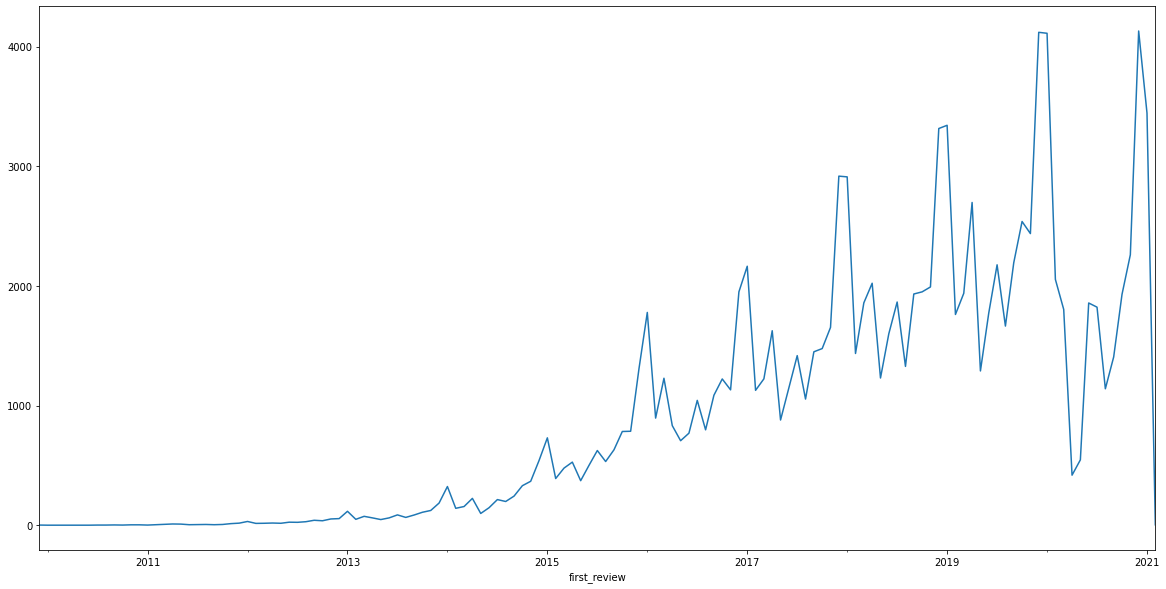

In [ ]:
growth_over_time.resample('M').count()['id'].rolling(1).mean().plot(kind = 'line',
                                     figsize = (20,10));

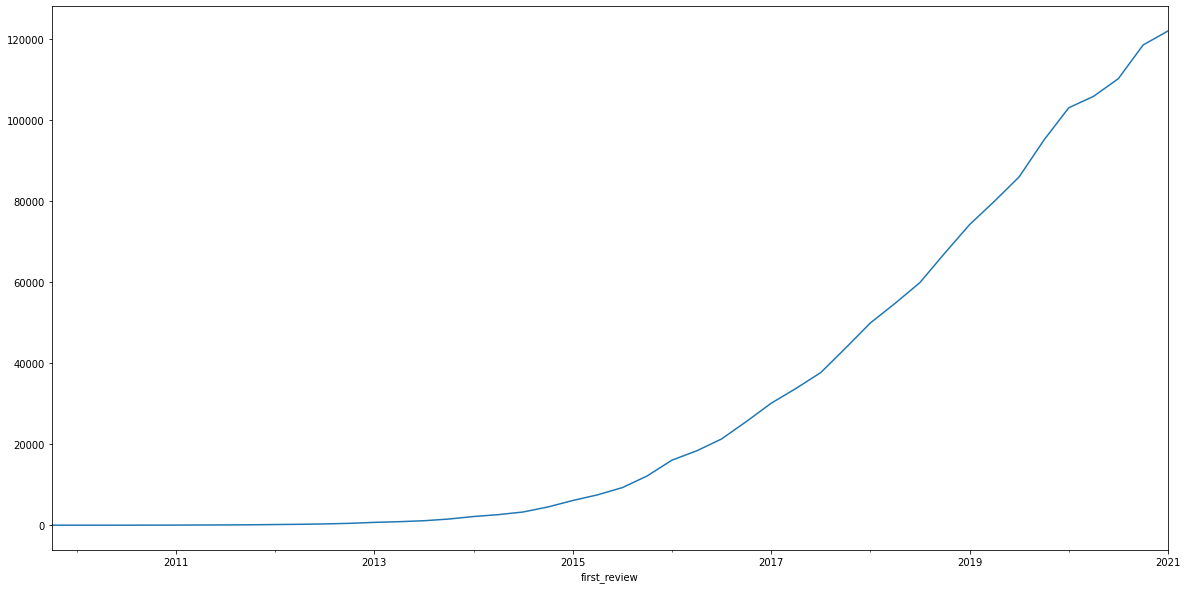

In [ ]:
growth_over_time.resample('Q').count()['id'].cumsum().plot(kind = 'line',
                                     figsize = (20,10));

In [ ]:
data

In [ ]:
#@title The new listings growth by room type over time
data2 = data.copy()
data2['first_review_year_month'] = data2['first_review'].dt.to_period('M')
data2.head(3)

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,...,bbq_grill,bed_linens,body_soap,ceiling_fan,conditioner,cooking_basics,dedicated_workspace,dishes_and_silverware,dishwasher,dryer,essentials,free_parking_on_premises,free_street_parking,freezer,garden_or_backyard,hair_dryer,hangers,heating,hot_water,iron,kitchen,lockbox,long_term_stays_allowed,microwave,nespresso_machine,oven,patio_or_balcony,private_entrance,refrigerator,shampoo,shower_gel,single_level_home,smoke_alarm,stove,tv,washer,wifi,shared_bathroom,bathrooms,first_review_year_month
0,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.10980,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,1.0,2020-11
1,38826228,2021-01-29,'Wendouree' is a centrally located heritage home,Treat yourself to a wonderful experience in a ...,'Wendouree' is located in the centre of Orange...,258660009,Paul,2019-04-28,AU,unknown,within a day,100.0,93.0,False,unknown,False,True,"Orange, New South Wales, Australia",-33.28167,149.09598,Entire house,Entire home/apt,12,5.0,8.0,757.0,2,15,15,1,2020-03-14,2021-01-04,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,...,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False,True,True,True,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,True,False,3.5,2020-03
2,21503504,2021-02-01,THE RESIDENCES - NUMBER 49,Boutique self-contained accommodation with Loc...,unknown,156236461,Janelle,2017-10-25,"Parkes, New South Wales, Australia",\r\nI am a local who thrives on renovating old...,within an hour,100.0,96.0,True,unknown,True,True,unknown,-33.13643,148.17308,Entire house,Entire home/apt,5,3.0,3.0,241.0,2,73,16,2,2017-12-25,2021-01-09,99.0,10.0,10.0,10.0,10.0,10.0,10.0,False,...,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,True,True,False,2.0,2017-12


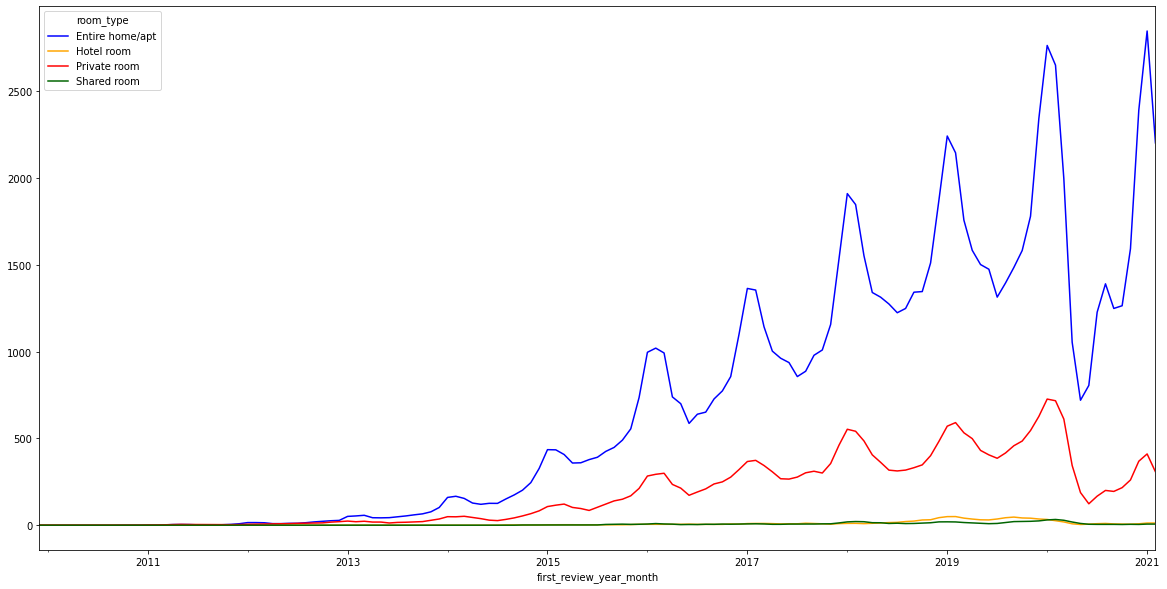

In [ ]:
pltdata = data2.pivot_table(values= 'id',
                            index = ['first_review_year_month'],
                            columns = ['room_type'],
                            aggfunc = 'count').resample('M').sum().rolling(3).mean()
pltdata.iloc[0,:].fillna(0,inplace=True)
pltdata.fillna(method='ffill',inplace=True)
pltdata.plot(figsize = (20,10),
            color = ['blue','orange','red','darkgreen']);

In [ ]:
pltdata.head(10)

room_type,Entire home/apt,Hotel room,Private room,Shared room
first_review_year_month,,,,
2009-12,0.0,0.0,0.0,0.0
2010-01,0.0,0.0,0.0,0.0
2010-02,0.0,0.0,0.0,0.0
2010-03,0.0,0.0,0.0,0.0
2010-04,0.0,0.0,0.0,0.0
2010-05,0.0,0.0,0.0,0.0
2010-06,0.0,0.0,0.0,0.0
2010-07,0.0,0.0,0.0,0.0
2010-08,0.0,0.0,0.0,0.0


In [ ]:
entire_apt_first_review = data2[data2['room_type'] == 'Entire home/apt'].groupby(['first_review_year_month']).count()['id'].rolling(3,center=True).mean().reset_index()
hotel_first_review = data2[data2['room_type'] == 'Hotel room'].groupby(['first_review_year_month']).count()['id'].rolling(3,center=True).mean().reset_index()
private_room_first_review = data2[data2['room_type'] == 'Private room'].groupby(['first_review_year_month']).count()['id'].rolling(3,center=True).mean().reset_index()
shared_room_first_review = data2[data2['room_type'] == 'Shared room'].groupby(['first_review_year_month']).count()['id'].rolling(3,center=True).mean().reset_index()

In [ ]:
data2.groupby('')

## Connect to Google Sheets


In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

Requirement already up-to-date: oauth2client in /usr/local/lib/python3.7/dist-packages (4.1.3)
  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# # Create a new Google Spreadsheets
sh = gc.create('First Review - Shared and Hotel Room')

# Choose the sheet to write
worksheet = sh.get_worksheet(0) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, shared_hotel_first_review) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

In [ ]:
shared_hotel_first_review = data2.pivot_table(index = ['first_review_year_month'],
                                              values = 'id',
                                              columns = ['room_type'],
                                              aggfunc = 'count').resample('M').sum().rolling(3).mean()#.reset_index()
shared_hotel_first_review.iloc[0,:].fillna(0,inplace=True)
shared_hotel_first_review.fillna(method='ffill',inplace=True)
shared_hotel_first_review.reset_index(inplace=True)
shared_hotel_first_review.head()

room_type,first_review_year_month,Entire home/apt,Hotel room,Private room,Shared room
0,2009-12,0.0,0.0,0.0,0.0
1,2010-01,0.0,0.0,0.0,0.0
2,2010-02,0.0,0.0,0.0,0.0
3,2010-03,0.0,0.0,0.0,0.0
4,2010-04,0.0,0.0,0.0,0.0


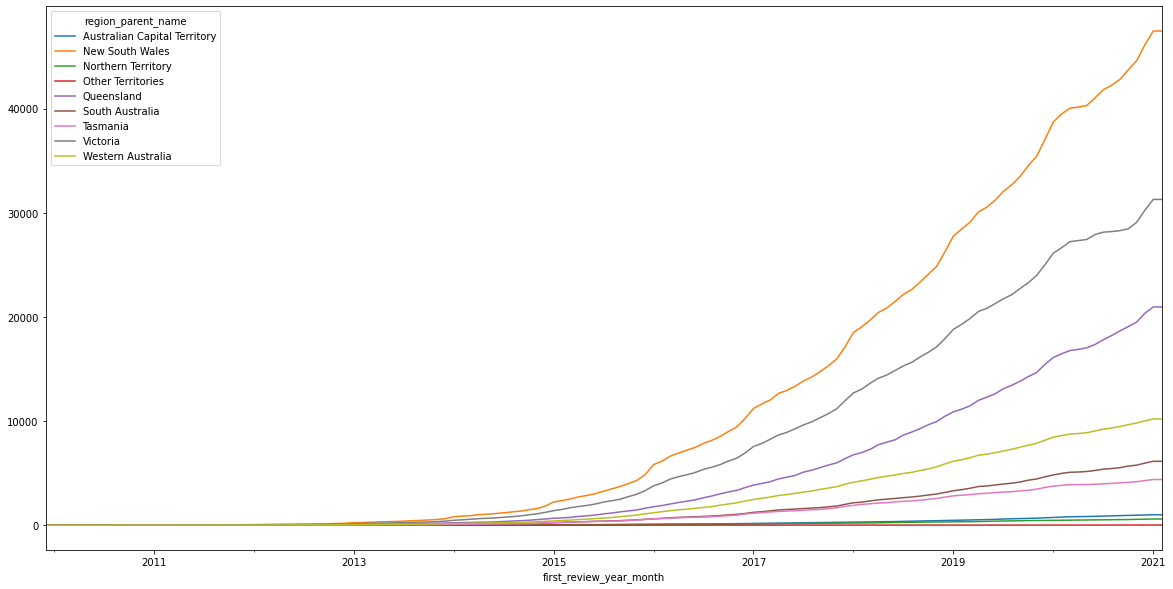

In [ ]:
#@title number of listings by Region
growth_by_region = data.copy()
growth_by_region['first_review_year_month'] = growth_by_region['first_review'].dt.to_period('M')

pltdata = growth_by_region.pivot_table(values= 'id',
                            index = ['first_review_year_month'],
                            columns = ['region_parent_name'],
                            aggfunc = 'count').resample('M').sum().cumsum()
# pltdata
pltdata.iloc[0,:].fillna(0,inplace=True)
pltdata.fillna(method='ffill',inplace=True)
pltdata.plot(figsize = (20,10));
# color = ['blue','orange','red','darkgreen']

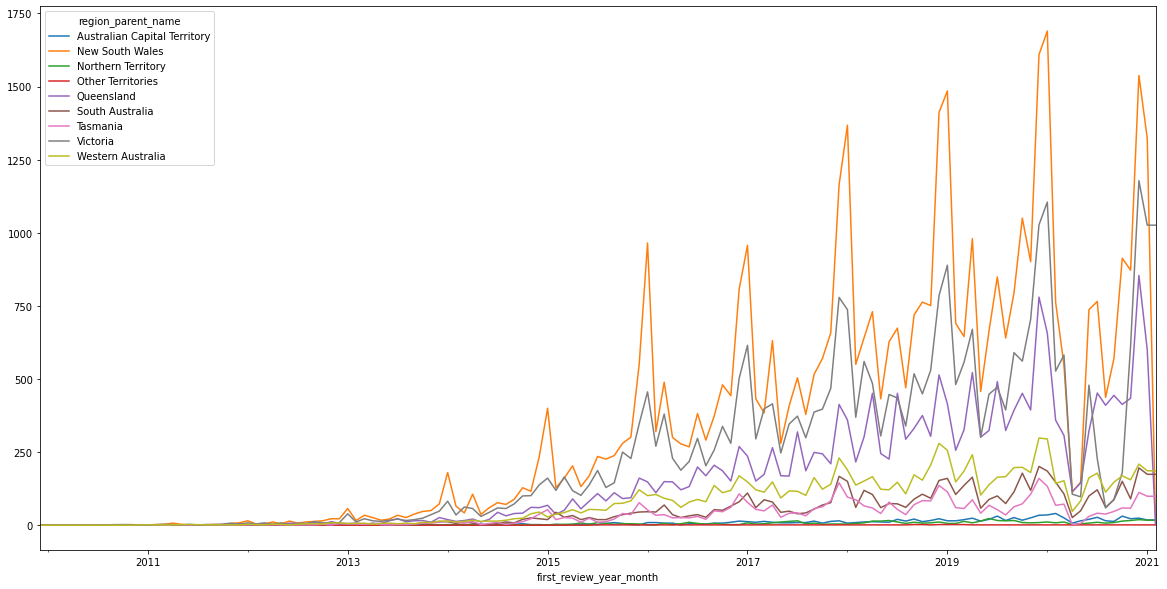

In [ ]:
pltdata = growth_by_region.pivot_table(values= 'id',
                            index = ['first_review_year_month'],
                            columns = ['region_parent_name'],
                            aggfunc = 'count').resample('M').sum()
# pltdata
pltdata.iloc[0,:].fillna(0,inplace=True)
pltdata.fillna(method='ffill',inplace=True)
pltdata.plot(figsize = (20,10));
# color = ['blue','orange','red','darkgreen']

In [ ]:
#@title number of visitors by region over time
visitor_by_region = data.copy()
visitor_by_region.drop(columns= visitor_by_region.columns[45:83],
                       inplace = True)
visitor_by_region = pd.merge(left = visitor_by_region,
                             right = dreviews,
                             left_on = 'id',
                             right_on = 'listing_id')
visitor_by_region['date'] = pd.to_datetime(visitor_by_region['date'])
visitor_by_region['review_year_month'] = visitor_by_region['date'].dt.to_period('M')
visitor_by_region.head()


,id_x,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,region_id,region_name,region_parent_id,region_parent_name,reviews_per_month,shared_bathroom,bathrooms,listing_id,id_y,date,reviewer_id,reviewer_name,comments,review_year_month
0,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.1098,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,16150,Orange,1,New South Wales,5.29,False,1.0,46142569,707255539,2020-11-07,101981439,Michael,Great place in a central location!,2020-11
1,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.1098,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,16150,Orange,1,New South Wales,5.29,False,1.0,46142569,709314540,2020-11-15,233029766,Melanie,"A great property, private and well appointed.",2020-11
2,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.1098,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,16150,Orange,1,New South Wales,5.29,False,1.0,46142569,710169549,2020-11-21,373920728,Jessica,Stylish and central . Great family getaway .,2020-11
3,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.1098,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,16150,Orange,1,New South Wales,5.29,False,1.0,46142569,710830609,2020-11-22,73880416,Hai,This place was so nice we decided to enjoy all...,2020-11
4,46142569,2021-01-30,The Old Corner Store | Central and Stylish,This tastefully converted old corner store is ...,Orange is a beautiful city distinguished by it...,53244166,BNB Made Easy: Timmy,2016-01-04,"Orange, New South Wales, Australia","Hello we are BNB Made Easy, a local Airbnb pro...",within an hour,100.0,100.0,True,unknown,True,True,"Orange, New South Wales, Australia",-33.28229,149.1098,Entire house,Entire home/apt,4,2.0,2.0,235.0,2,15,15,7,2020-11-07,2021-01-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,16150,Orange,1,New South Wal

In [ ]:
visitor_by_region['price'].sum()

833618710.0

In [ ]:
visitor_by_region.shape

(4319186, 54)

In [ ]:
visitor_by_region['host_id'].nunique()

76427

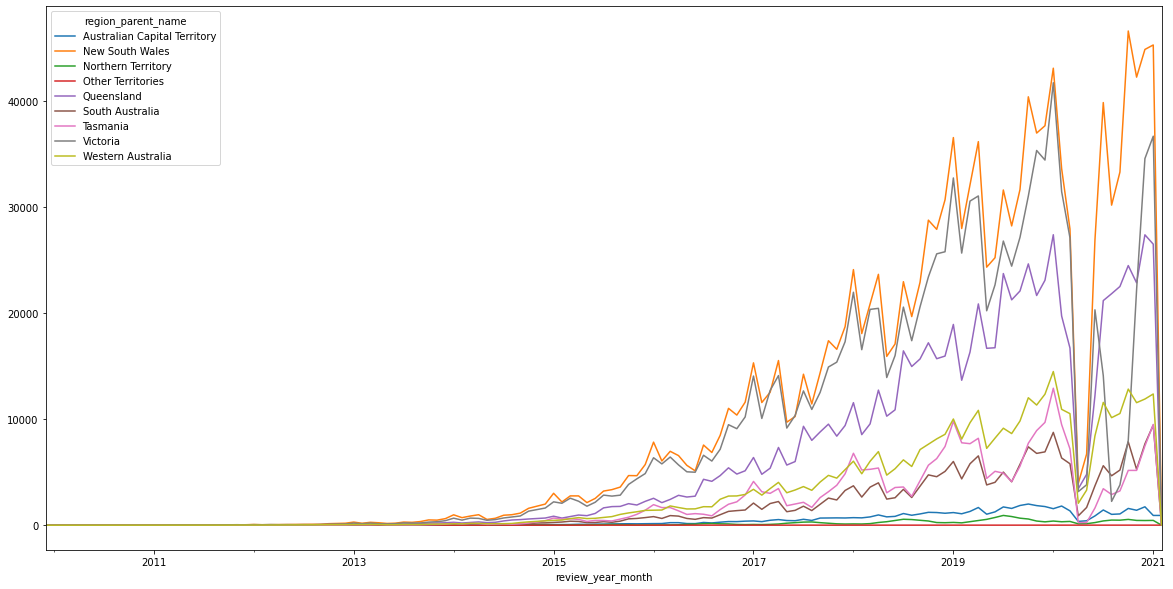

In [ ]:
pltdata = visitor_by_region.pivot_table(values= 'id_y',
                            index = ['review_year_month'],
                            columns = ['region_parent_name'],
                            aggfunc = 'count').resample('M').sum()
pltdata.iloc[0,:].fillna(0,inplace=True)
pltdata.fillna(method='ffill',inplace=True)
pltdata.plot(figsize = (20,10));

In [ ]:
dreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586776 entries, 0 to 4586775
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 210.0+ MB


## Data Exploratory


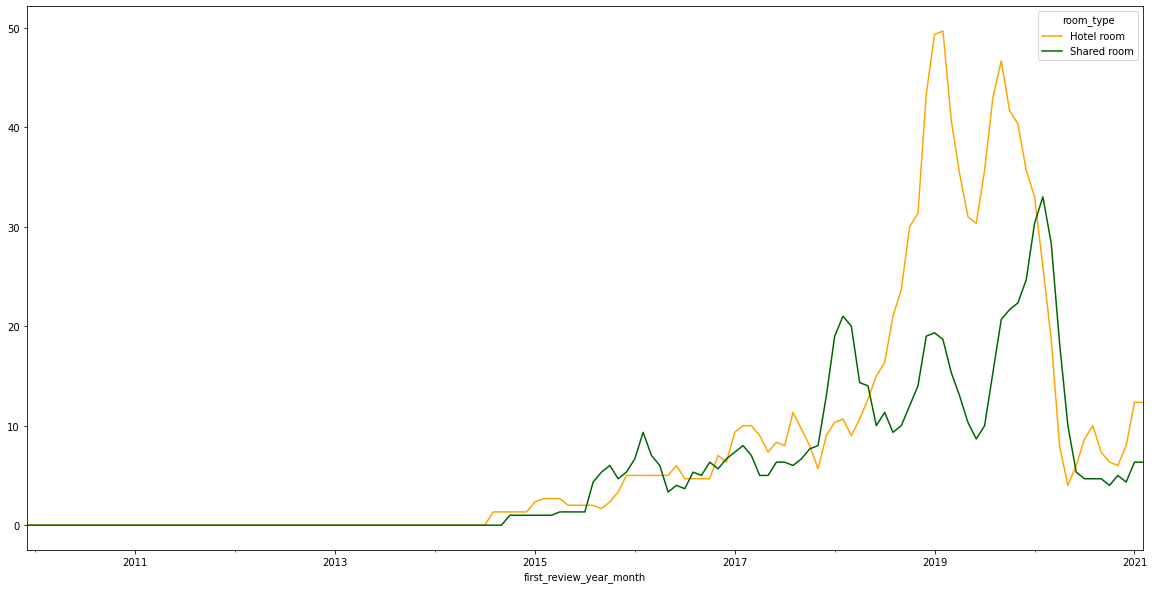

In [ ]:
pltdata = data2.pivot_table(values= 'id',
                            index = ['first_review_year_month'],
                            columns = ['room_type'],
                            aggfunc = 'count').loc[:,['Hotel room','Shared room']].rolling(3).mean()
pltdata.iloc[0,:].fillna(0,inplace=True)
pltdata.fillna(method='ffill',inplace=True)
pltdata.plot(figsize = (20,10),
             color = ['orange','darkgreen'])

In [ ]:
growth_over_time.resample('M').count()['id'].cumsum().head(10)

first_review
2009-12-31    1
2010-01-31    1
2010-02-28    1
2010-03-31    1
2010-04-30    1
2010-05-31    1
2010-06-30    1
2010-07-31    2
2010-08-31    3
2010-09-30    5
Freq: M, Name: id, dtype: int64